## Project 01

**Type your name here**

**DSCI 35600 - Machine Learning**

## Part A: Import Packages and Load Dataset

In the cell below, import the following packages using the standard aliases: `numpy`, `matplotlib.pyplot`, and `pandas`. Also import the following classes and functions from `sklearn`: `train_test_split`, `LogisticRegression`, `KNeighborsClassifier`, `DecisionTreeClassifier`, `RandomForestClassifier`, `StandardScaler`, and `OneHotEncoder`.  

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

Use `pandas` to load the contents of the tab-separated file `hw_11_data.txt` into a dataframe called `df`. Display the first 10 rows of this dataframe.

In [8]:
df = pd.read_csv('Project01_data.txt', sep='\t')
df.index
df.columns
df.values
#df.head(10)



array([[15.69, -0.7709999999999999, 550.8804585986512, 'P', 'D', 0],
       [-16.810000000000002, 1.959, 588.523801454376, 'Q', 'C', 3],
       [21.09, -1.55, 660.8818340972173, 'P', 'B', 2],
       ...,
       [4.55, -0.752, 690.5257749725142, 'P', 'A', 2],
       [-22.53, -1.7530000000000001, 550.5110922024577, 'Q', 'C', 2],
       [-26.12, -2.125, 553.4853842011222, 'P', 'C', 2]], dtype=object)

Your goal in this assignment will be to use features F1 - F6 to predict one of four possible values for y: 0, 1, 2, or 3. 

## Part B: Preparing the Data

In the cell below, create the following arrays:

* `X_num` should contain the columns of `df` associated with numerical variables. 
* `X_cat` should contain the columns of `df` associated with categorical variables. 
* `y` should be a 1D array contain the values of the label, `y`. 

Print the shapes of these three arrays.

In [4]:
X_num = df.iloc[:,[0,1,2]].values
X_cat = df.iloc[:,[3,4]].values
y = df.iloc[:,5].values

print('X_num.shape =', X_num.shape)
print('X_cat.shape =', X_cat.shape)
print('y.shape =', y.shape)

X_num.shape = (467, 3)
X_cat.shape = (467, 2)
y.shape = (467,)


#### Numerical Features
Split `Xnum` into training and validation sets called `X_num_train` and `X_num_val`. Use an 80/20 split, and set `random_state=1`. 

Then use the `StandardScaler` class to scale the numerical data. Name the resulting arrays `X_sca_train` and `X_sca_val`. Print the shape of these two arrays. 

In [5]:
X_num_train, X_num_val, y_train, y_val = train_test_split(X_num, y, test_size=0.20, random_state=1)

scaler = StandardScaler()
X_sca_train = scaler.fit_transform(X_num_train)
X_sca_val = scaler.fit_transform(X_num_val)


print('This is X_sca_train.shape \n', X_sca_train.shape)
print('This is X_sca_val.shape \n', X_sca_val.shape)
print()
X_sca_train

This is X_sca_train.shape 
 (373, 3)
This is X_sca_val.shape 
 (94, 3)



array([[-1.34790978, -0.85473365, -0.03279194],
       [-0.70984609, -0.4799912 ,  0.9331761 ],
       [-0.98459949,  1.88147176,  2.06401676],
       ...,
       [ 0.95173081, -0.89923432, -0.40795084],
       [ 0.7468011 ,  0.98560309, -0.96206722],
       [-0.15636557,  1.0558673 , -0.28997942]])

Categorical Features

Use the `OneHotEncoder` class to encode the categorical feature array (setting `sparse=False`). Store the results in an array called `X_enc`. 

Split `X_enc` into training and validation sets called `X_enc_train` and `X_enc_val`. Use an 80/20 split, and set `random_state=1`. Print the shapes of these two arrays.

In [20]:
enc = OneHotEncoder(sparse = False)
X_enc = enc.fit_transform(X_cat)
#print(X_enc[0:2,]) #printing the first two rows of data
      
X_enc_train, X_enc_val = train_test_split(X_enc, test_size=0.20, random_state=1)

print(X_enc_train.shape)
print(X_enc_val.shape)

[[1. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0.]]
(373, 6)
(94, 6)


#### Combine Numerical and Categorial Features

Use `np.hstack()` to combine `X_sca_train` and `X_enc_train` into an array called `X_train`. Then combine `X_sca_val` and `X_enc_val` into an array called `X_val`. Print the shapes of the two new arrays.

In [21]:
X_train = np.hstack((X_sca_train, X_enc_train))
X_val = np.hstack((X_sca_val, X_enc_val))

print('This is X_train values \n', X_train.shape)
print('This is X_val values \n', X_val.shape)

X_train[0:3,]

This is X_train values 
 (373, 9)
This is X_val values 
 (94, 9)


array([[-1.34790978, -0.85473365, -0.03279194,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  1.        ],
       [-0.70984609, -0.4799912 ,  0.9331761 ,  1.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ],
       [-0.98459949,  1.88147176,  2.06401676,  0.        ,  1.        ,
         0.        ,  0.        ,  1.        ,  0.        ]])

## Part C: Logistic Regression Model

In the cell below, create and fit several logistic regression models, each with a different value for the regularization parameter `C`. In particular, consider 100 models with `C=10**k`, where `k` ranges from -4 to 0. For each model, log the training and validation accuracies in separate lists, and then plot these lists against `k`. Display a legend for your plot. 

Set `solver='lbfgs'` and `multi_class='ovr'` when creating your logistic regression models. 

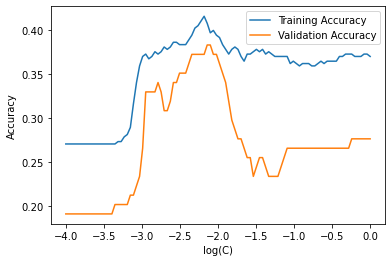

In [23]:
tr_acc = []
va_acc = []
exp_list = np.linspace(-4, 0, 100)

for k in exp_list:
    temp_mod = LogisticRegression(solver='lbfgs', C=10**k, multi_class='ovr')
    temp_mod.fit(X_train, y_train)
    tr_acc.append(temp_mod.score(X_train, y_train))
    va_acc.append(temp_mod.score(X_val, y_val))
    
plt.figure(figsize=([6,4]))
plt.plot(exp_list, tr_acc, label='Training Accuracy')
plt.plot(exp_list, va_acc, label='Validation Accuracy')
plt.xlabel('log(C)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Use `np.argmax` to find the value of `k` that results in the largest validation accuracy. Print this result.

In [9]:
idx = np.argmax(va_acc)
best_logC = exp_list[idx]
print(best_logC)

-2.141414141414141


Create a logistic regression model using the previously determined value for the regularization parameter. Print the training and validation accuracies for this model, clearly indicating which is which.

In [10]:
mod_01 = LogisticRegression(solver='lbfgs', C=10**best_logC, multi_class='ovr')
mod_01.fit(X_train, y_train)

print('Training Accuracy: ', mod_01.score(X_train, y_train))
print('Validation Accuracy:', mod_01.score(X_val, y_val))

Training Accuracy:  0.4075067024128686
Validation Accuracy: 0.3829787234042553


## Part D: Decision Tree Model

In the cell below, create and fit several decision tree models, each with a different value for the `max_depth` parameter. In particular, consider models for every value of max_depth from 1 to 20. For each model, log the training and validation accuracies in separate lists, and then plot these lists against the max depth. Display a legend for your plot. 

Set a seed of 1 prior to training each of your models. This should be inside of your loop. 

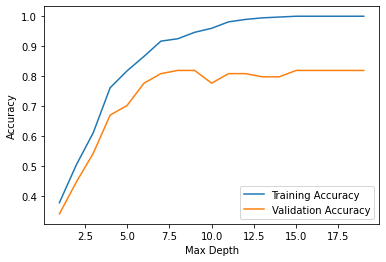

In [11]:
tr_acc = []
va_acc = []
depth_list = range(1,20)

for d in depth_list:
    np.random.seed(1)
    temp_mod = DecisionTreeClassifier(max_depth=d)
    temp_mod.fit(X_train, y_train)
    tr_acc.append(temp_mod.score(X_train, y_train))
    va_acc.append(temp_mod.score(X_val, y_val))
    
plt.figure(figsize=([6,4]))
plt.plot(depth_list, tr_acc, label='Training Accuracy')
plt.plot(depth_list, va_acc, label='Validation Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Use `np.argmax` to find the value of `max_depth` that results in the largest validation accuracy. Print this result. 

In [12]:
idx = np.argmax(va_acc)
best_d = depth_list[idx]
print(best_d)

8


Create a tree model using the previously determined value of `max_depth`. Print the training and validation accuracies for this model, clearly indicating which is which.

Set a seed of 1 at the beginning of this cell.

In [13]:
np.random.seed(1)
mod_02 = DecisionTreeClassifier(max_depth = best_d)
mod_02.fit(X_train, y_train)

print('Training Accuracy: ', mod_02.score(X_train, y_train))
print('Validation Accuracy: ', mod_02.score(X_val, y_val))

Training Accuracy:  0.9249329758713136
Validation Accuracy:  0.8191489361702128


## Part E: Random Forest Model

In the cell below, create and fit several random forest models, each with a different value for the `max_depth` parameter. In particular, consider models for every value of max_depth from 1 to 20. Set `n_estimators=200` for each model. After training each model, log the training and validation accuracies in seperate lists, and then plot these lists against the max depth. Label your axes, and display a legend for your plot. 

Set a seed of 1 prior to training each of your models. This should be inside of your loop. 

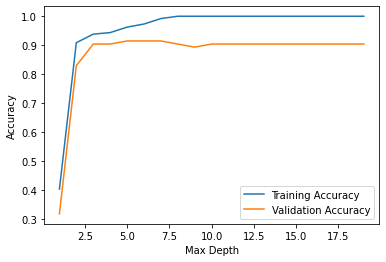

In [14]:
max_depth = range(1,20)
tr_acc = []
va_acc = []

for d in depth_list:
    np.random.seed(1)
    temp_mod = RandomForestClassifier(n_estimators=200, max_depth=d)
    temp_mod.fit(X_train, y_train)
    tr_acc.append(temp_mod.score(X_train, y_train))
    va_acc.append(temp_mod.score(X_val, y_val))
    
plt.figure(figsize=([6,4]))
plt.plot(depth_list, tr_acc, label='Training Accuracy')
plt.plot(depth_list, va_acc, label='Validation Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Use `np.argmax` to find the value of `max_depth` that results in the largest validation accuracy. Print this result. 

In [15]:
idx = np.argmax(va_acc)
best_d = depth_list[idx]
print(best_d)

5


Create a random forest model using the previously determined value of `max_depth` and `n_estimators=200`. Print the training and validation accuracies for this model, clearly indicating which is which.

Set a seed of 1 at the beginning of this cell.

In [16]:
np.random.seed(1)
mod_03 = RandomForestClassifier(n_estimators=200, max_depth = best_d)
mod_03.fit(X_train, y_train)

print('Training Accuracy: ', mod_03.score(X_train, y_train))
print('Validation Accuracy: ', mod_03.score(X_val, y_val))

Training Accuracy:  0.9624664879356568
Validation Accuracy:  0.9148936170212766


## Part F: Summary

Print the validation accuracies for each of the three models, clearly indicating which is which. 

In [17]:
print('Model 01 Validation Accuracy:', mod_01.score(X_val, y_val))
print('Model 02 Validation Accuracy:', mod_02.score(X_val, y_val))
print('Model 03 Validation Accuracy:', mod_03.score(X_val, y_val))

Model 01 Validation Accuracy: 0.3829787234042553
Model 02 Validation Accuracy: 0.8191489361702128
Model 03 Validation Accuracy: 0.9148936170212766
